# Strava Activities Heatmap - Data Preparation
## Author: Oliver Gladfelter
### June 11, 2020
#### Credit to https://nbviewer.jupyter.org/github/titsworth/hsvpy-runtalk/tree/master/, from which most of this code is borrowed from

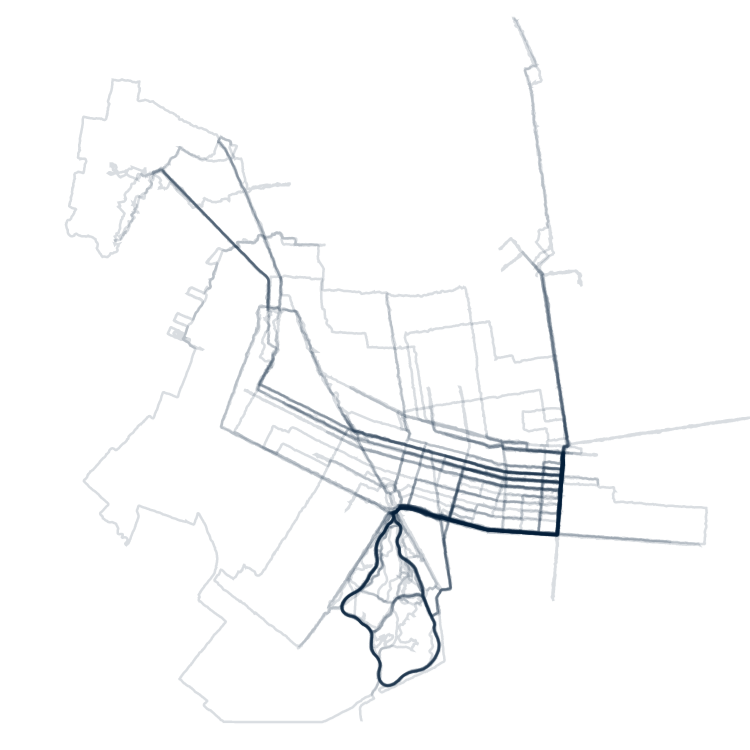

In [3]:
from IPython.display import Image
Image("https://cultureplot.com/img/run_map_thumbnail.png")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import gpxpy
import gpxpy.gpx
import os
import random

%matplotlib inline

In [5]:
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.values(): 
        spine.set_visible(False)
        
def load_run_data(gpx_path, filter=""):
    """ 
    paramater: gpx_path - a path to a folder full of gpx files
    returns a list of lists of parsed gpx data
    """

    # List all of the GPX files in the path
    gpx_files = glob.glob(os.path.join(gpx_path,filter+"*.gpx"))

    run_data = []
    
    # Loop through the files
    for file_idx, gpx_file in enumerate(gpx_files): 
        # Parse the GPX File
        try:
            gpx = gpxpy.parse(open(gpx_file, 'r'))
        except: 
            #os.remove(gpx_file)
            continue
         
        # gives us activity ID, gpx file path, latitude, longitude, elevation
        run_data_tmp = [[file_idx, gpx_file, point.latitude,point.longitude, point.elevation] 
                            for track in gpx.tracks 
                                for segment in track.segments 
                                    for point in segment.points]
        run_data += run_data_tmp
        
    return run_data

In [6]:
# Parse the gpx files and save data to a list of lists
# "Strava_Runs" is the name of a folder in the same directory as this notebook. It contains GPX files downloaded from Strava.
run_data = load_run_data("Strava_Runs")

## Plot GPX Activities

In [7]:
def plot_run_data(coords):
    coords_df = pd.DataFrame(coords, columns=['Index','File_Name','Latitude','Longitude','Altitude'])  
    
    # print number of activities in the heatmap
    print(len(coords_df['Index'].unique()))
    
    fig = plt.figure(figsize=(8,8))

    for num in coords_df['Index'].unique():
        run_coords = coords_df[coords_df['Index']==num]
        plt.plot(run_coords['Longitude'],run_coords['Latitude'], color='#FFFFFF', linewidth=1, alpha=0.5)

    ax = plt.gca()
    plt.grid(False)
    ax.patch.set_facecolor('#001933')
    ax.set_aspect('auto','box','C')
    clear_frame()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=.1)
    
    # optional: if run_data contains activities from multiple cities, focus your heatmap on any
    # given city by setting the plot boundaries as the citie's min and max long and lat coordinates
    # example: brooklyn
    plt.xlim((-74.022393,-73.912763))
    plt.ylim((40.647789,40.730217))

238


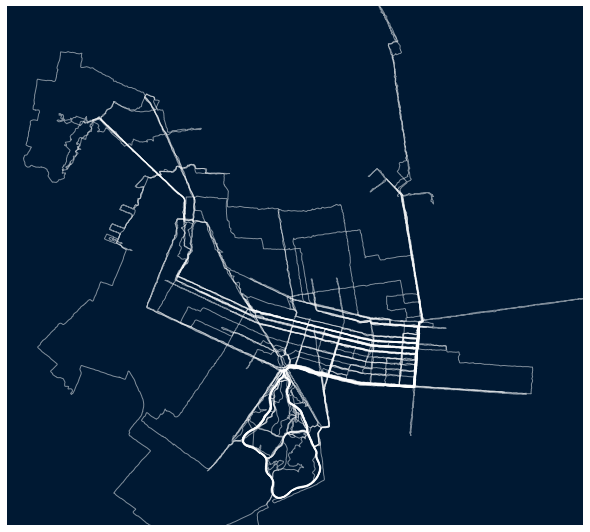

In [9]:
plot_run_data(run_data)

## Export

In [11]:
# all runs
run_df = pd.DataFrame(run_data, columns=['Index','File_Name','Latitude','Longitude','Altitude'])  
run_df.to_csv("all_runs.csv", index=False)

# brookyln
nyc = run_df[(run_df['Longitude'] < -73.912763) & (run_df['Longitude'] > -74.022393) & (run_df['Latitude'] < 40.730217) & (run_df['Latitude'] > 40.647789)]
nyc.to_csv("nyc_runs.csv", index=False)

## Some Added Data Privacy
#### For public facing projects, you can offset your coordinates by random numbers for a layer of data privacy. This isn't 100% foolproof, but will make finding the exact start/end coordinates of your activities harder.

In [ ]:
longtitude_offset = random.randrange(-100, 100)
latitude_offset = random.randrange(-100, 100)

nyc['Longitude2'] = nyc['Longitude'] + longtitude_offset
nyc['Latitude2'] = nyc['Latitude'] - latitude_offset

nyc.to_csv("nyc_runs_offset.csv", index=False)